<a href="https://colab.research.google.com/github/sksvineeth/Text_and_clustering/blob/main/EDA_and_Idea_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries here; add more as necessary
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import missingno
nltk.download('punkt')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb


from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from pandas.core.computation.check import NUMEXPR_INSTALLED

ImportError: ignored

In [ ]:
Projects (Select only one)

Project 1 - Netflix Model

Download Dataset https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv

Build Model(s)

· Group different movies using text and clustering algorithm.

· Use the clusters as labels to build a classification model (either Deep learning or Sequence models).

In [ ]:
np.random.seed(5)
N_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv')

In [ ]:
#N_data.groupby('type').count()

data = N_data.dropna(subset=['rating'])

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


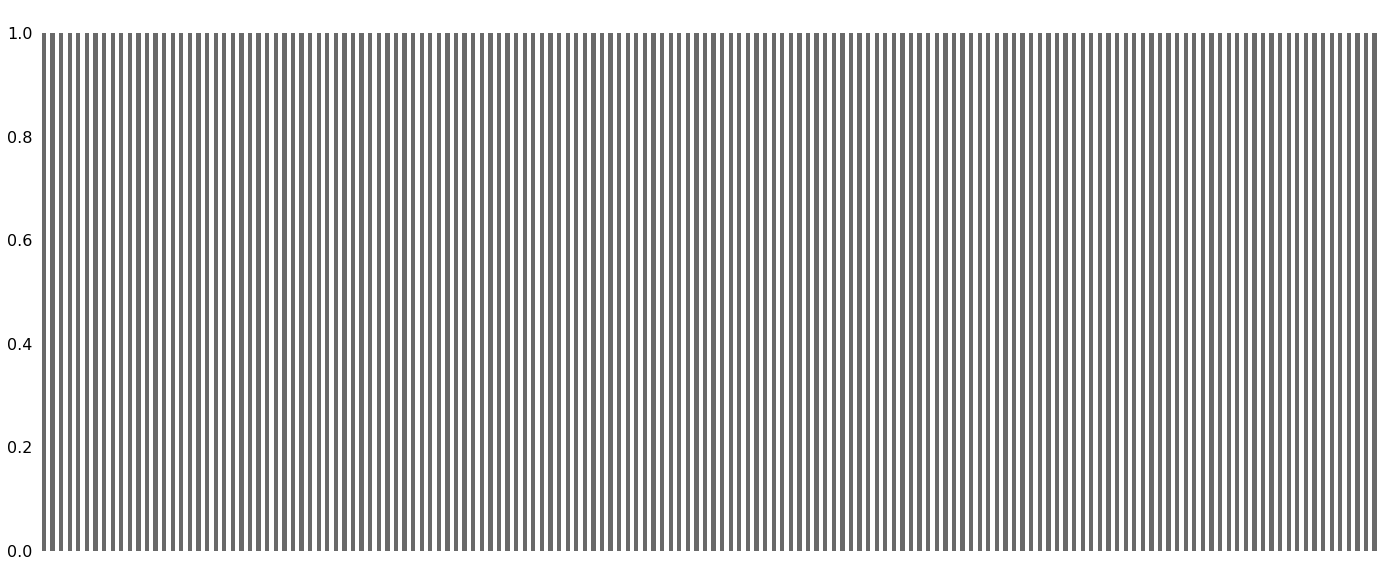

In [ ]:
# Observation 1 : As we have consider only movies let's drop 
# tv shows and we can notice there are very few missing values, so let's drop them too
#data = data.loc[(data["type"] != 'TV Show')]
#data = data.dropna(subset=['cast', 'country', 'rating'])
missingno.bar(data);
#data.shape

In [ ]:
def clean(column_name):
    """This function takes a column from the dataframe and splits two elements
       if they are separated by a comma.
       For ex. in Actors column there might be values such as Christian Bale, Morgan Freeman.
       This will separate these two actors and store them individually in a list."""
    name=set()
    for name_string in data[column_name]:
        name.update(name_string.split(', '))
    name=sorted(name)
    return name

def top(column_name):
    """This function takes its input as name of the column and returns a sorted list of the 
       elements which occur very frequently in that column in descending order."""
    
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in data[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    return nlt.index
    
def plot_column(column_name,n_elem_display=0):
    """ This function is used to plot a bar graph of a column of the dataframe.
        It takes its argument as name of column and number of elements to display and
        return a bar graph of the user defined number of top elements which occur
        frequently in that column."""
    
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in data[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    if n_elem_display !=0:
        return nlt[:n_elem_display].plot(kind = "bar",figsize=(10,10))
    else:
        return nlt[:].plot(kind = "bar",figsize=(10,5))

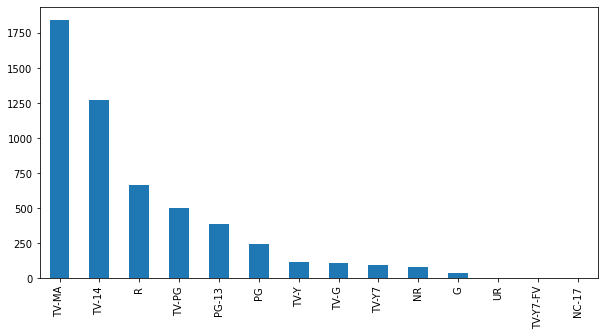

In [ ]:
plot_column('rating')

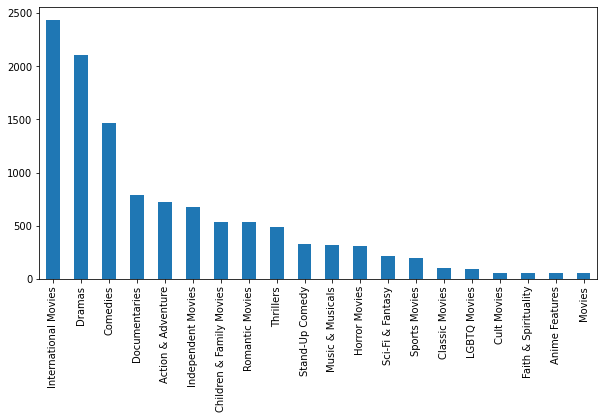

In [ ]:
plot_column('listed_in')
#Get the unique genres contained in the dataframe
genres= clean('listed_in')
#Add one column for every genre in the dataframe
for genre in genres:
    data["genre:"+genre] = [int(genre in g.split(', ')) for g in data.listed_in]

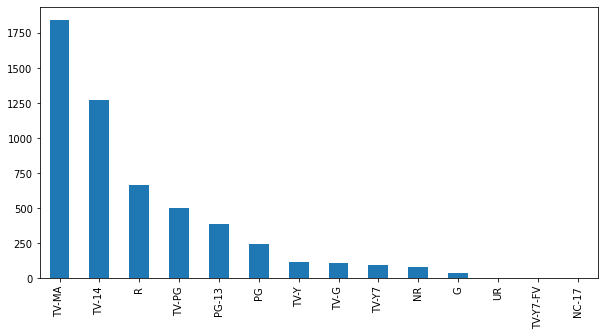

In [ ]:
plot_column('rating')
#Get the unique genres contained in the dataframe
ratings= clean('rating')
#Add one column for every genre in the dataframe
for rating in ratings:
    data["rating:"+rating] = [int(rating in g.split(', ')) for g in data.rating]

In [ ]:
#data = data.drop([ 'index'])
data = data.fillna('missing')
#plot_column('cast', 50)
#Get the unique genres contained in the dataframe
Actors= top('cast')
#Add one column for every genre in the dataframe
for Actor in Actors[:50]:
    data["Cast:"+ Actor] = [int(Actor in g.split(', ')) for g in data.cast]

In [ ]:
#data.head()
directors=top('director')
    
for director in directors[:50]:
    data["Director:"+director] = [int(director in d.split(', ')) for d in data.director]

In [ ]:
countries=top('country')

for country in countries[:10] :
    data["Country:"+country] = [int(country in c.split(', ')) for c in data.country]

In [ ]:
sum(data['Country:India'])

915

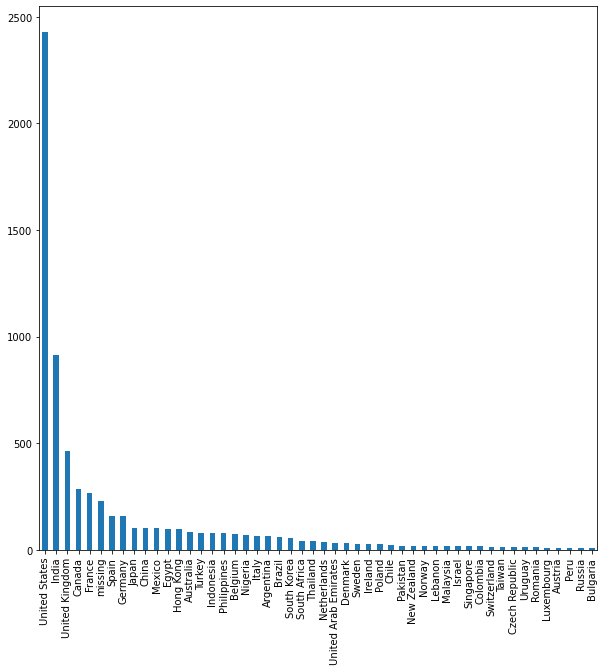

In [ ]:
plot_column('country', 50)

In [ ]:
'''
import numpy as np
import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

actors = []

for i in data['cast']:
    actor = re.split(r', \s*', i)
    actors.append(actor)
    
flat_list = []
for sublist in actors:
    for item in sublist:
        flat_list.append(item)
        
actors_list = sorted(set(flat_list))

binary_actors = [[0] * 0 for i in range(len(set(flat_list)))]

for i in data['cast']:
    k = 0
    for j in actors_list:
        if j in i:
            binary_actors[k].append(1.0)
        else:
            binary_actors[k].append(0.0)
        k+=1
        
binary_actors = pd.DataFrame(binary_actors).transpose()
        
directors = []

for i in data['director']:
    if pd.notna(i):
        director = re.split(r', \s*', i)
        directors.append(director)
    
flat_list2 = []
for sublist in directors:
    for item in sublist:
        flat_list2.append(item)
        
directors_list = sorted(set(flat_list2))

binary_directors = [[0] * 0 for i in range(len(set(flat_list2)))]

for i in data['director']:
    k = 0
    for j in directors_list:
        if pd.isna(i):
            binary_directors[k].append(0.0)
        elif j in i:
            binary_directors[k].append(1.0)
        else:
            binary_directors[k].append(0.0)
        k+=1
        
binary_directors = pd.DataFrame(binary_directors).transpose()
        
countries = []

for i in data['country']:
    country = re.split(r', \s*', i)
    countries.append(country)
    
flat_list3 = []
for sublist in countries:
    for item in sublist:
        flat_list3.append(item)
        
countries_list = sorted(set(flat_list3))

binary_countries = [[0] * 0 for i in range(len(set(flat_list3)))]

for i in data['country']:
    k = 0
    for j in countries_list:
        if j in i:
            binary_countries[k].append(1.0)
        else:
            binary_countries[k].append(0.0)
        k+=1
        
binary_countries = pd.DataFrame(binary_countries).transpose()

genres = []

for i in data['listed_in']:
    genre = re.split(r', \s*', i)
    genres.append(genre)
    
flat_list4 = []
for sublist in genres:
    for item in sublist:
        flat_list4.append(item)
        
genres_list = sorted(set(flat_list4))

binary_genres = [[0] * 0 for i in range(len(set(flat_list4)))]

for i in data['listed_in']:
    k = 0
    for j in genres_list:
        if j in i:
            binary_genres[k].append(1.0)
        else:
            binary_genres[k].append(0.0)
        k+=1
        
binary_genres = pd.DataFrame(binary_genres).transpose()

ratings = []

for i in data['rating']:
    ratings.append(i)

ratings_list = sorted(set(ratings))

binary_ratings = [[0] * 0 for i in range(len(set(ratings_list)))]

for i in data['rating']:
    k = 0
    for j in ratings_list:
        if j in i:
            binary_ratings[k].append(1.0)
        else:
            binary_ratings[k].append(0.0)
        k+=1
'''
year = []

for i in data['date_added']:
    year.append(i)

year_list = sorted(set(year))

binary_year = [[0] * 0 for i in range(len(set(year)))]

for i in data['year']:
    k = 0
    for j in year_list:
        if j in i:
            binary_year[k].append(1.0)
        else:
            binary_year[k].append(0.0)
        k+=1
        
binary_year = pd.DataFrame(binary_year).transpose()''' '''

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"\nyear = []\n\nfor i in data['date_added']:\n    year.append(i)\n\nyear_list = sorted(set(year))\n\nbinary_year = [[0] * 0 for i in range(len(set(year)))]\n\nfor i in data['year']:\n    k = 0\n    for j in year_list:\n        if j in i:\n            binary_year[k].append(1.0)\n        else:\n            binary_year[k].append(0.0)\n        k+=1\n        \nbinary_year = pd.DataFrame(binary_year).transpose()"

In [ ]:
def my_analyzer(s):
# Synonym List
    syns = {'wont':'would not', 'cant':'can not', 'cannot':'can not', \
    'couldnt':'could not', 'shouldnt':'should not', \
    'wouldnt':'would not', 'straightforward': 'straight forward' }
    # Preprocess String s
    s = s.lower()
    #Replace special characters with spaces
    s = s.replace('-', ' ')
    s = s.replace('_', ' ')
    s = s.replace(',', '. ')
    s = s.replace('\\',"")
    s = s.replace('.',"")

    # Replace not contraction with not
    s = s.replace("'nt", " not")
    s = s.replace("n't", " not")

    # Tokenize
    tokens = word_tokenize(s)

    #tokens = [word.replace(',','') for word in tokens ]

    tokens = [word for word in tokens if ('*' not in word) and \
    ("''" != word) and ("``" != word) and \
    (word!='description') and (word !='dtype') \
    and (word != 'object') and (word!="'s")]

    # Map synonyms
    for i in range(len(tokens)):
        if tokens[i] in syns:
            tokens[i] = syns[tokens[i]]

    # Remove stop words
    punctuation = list(string.punctuation)+['..', '...']
    pronouns = ['i', 'he', 'she', 'it', 'him', 'they', 'we', 'us', 'them','he ']
    others = ["'d", "co", "ed", "put", "say", "get", "can", "become",\
            "los", "sta", "la", "use","ask" "iii", "else","doesn't","dr.","well","let","soon","finally","around","little",\
              "would","set","use","place","still","three","arrive","next","anoth","keep","must","mr.","bring",\
              "much","many","eventually","explain","asks","along","may","small","hold","realize","think","continue",\
             "last","behind","discover","something","several","end","large","high","mr","the","dr","mr"]
    names = ["harry","travis","tommy","joe","jack","dorothy","mike","george","frank","frankie",\
            "frank ","sarah","andrew","taylor","arthur","luke","kane","wallace","parker","danny","tony",\
            "michael","luke","kane","danny","john","max","tom","paul","ca","neil","maria","barry","anna","jerry",\
            "alex","terry","henry","gordon","leonard","wayne","vincent","jimmy","jordan","sam","nick","nicholson",\
            "jake","rocky"]

    stop = stopwords.words('english') + punctuation + pronouns + others + names
    filtered_terms = [word for word in tokens if (word not in stop) and \
    (len(word)>1) and (not word.replace('.','',1).isnumeric()) \
    and (not word.replace("'",'',2).isnumeric())]

    # Lemmatization & Stemming - Stemming with WordNet POS
    # Since lemmatization requires POS need to set POS
    tagged_words = pos_tag(filtered_terms, lang='eng')

    # Stemming with for terms without WordNet POS
    stemmer = SnowballStemmer("english")
    wn_tags = {'N':wn.NOUN, 'J':wn.ADJ, 'V':wn.VERB, 'R':wn.ADV}
    wnl = WordNetLemmatizer()
    stemmed_tokens = []
    for tagged_token in tagged_words:
        term = tagged_token[0]
        pos = tagged_token[1]
        pos = pos[0]
        try:
            pos = wn_tags[pos]
            stemmed_tokens.append(wnl.lemmatize(term, pos=pos))
        except:
            stemmed_tokens.append(stemmer.stem(term))
    return stemmed_tokens

In [ ]:

n_plots = len(data['description']) # Number of Plots
s_words = 'english' # Stop Word Dictionary
ngram = (1,3) # n-gram POS modeling
plots = data['description'].map(str) # place all text reviews in reviews
tfidf=True

In [ ]:
# Create Word Frequency by Review Matrix using Custom Analyzer

import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer 
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import os
import codecs
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn

cv = CountVectorizer(max_df=0.9, min_df=3, max_features=None ,\
analyzer=my_analyzer, ngram_range=ngram)
tf1 = cv.fit_transform(plots)
terms1 = cv.get_feature_names()
term_sums = tf1.sum(axis=0)
term_counts = []
out1 = []
out2 = []
for i in range(len(terms1)):
    term_counts.append([terms1[i], term_sums[0,i]])
def sortSecond(e):
    return e[1]
term_counts.sort(key=sortSecond, reverse=True)
print("\nTerms with Highest Frequency:")
for i in range(400):
    print('{:<15s}{:>5d}'.format(term_counts[i][0], term_counts[i][1]))
    out1.append([term_counts[i][0], term_counts[i][1]])
np.savetxt("frequency_100.csv", out1, delimiter=",", fmt='%s')
print("")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!

Terms with Highest Frequency:
life             611
young            521
find             467
woman            434
man              413
new              411
family           408
take             393
love             357
friend           326
two              309
year             291
documentary      276
world            270
one              246
father           237
old              231
help             225
try              219
make             213
turn             203
home             201
fall             192
story            189
girl             187
school           185
g

In [ ]:
# if tfidf is requested, replace tf matrix with frequencies weighted by IDF
if tfidf == True:
    # Construct the TF/IDF matrix from the data
    print("Conducting Term/Frequency Matrix using TF-IDF")
    tfidf_vect = TfidfVectorizer(max_df=0.7, min_df=5, \
    max_features=None,\
    analyzer=my_analyzer, ngram_range=ngram)
    tf = tfidf_vect.fit_transform(plots)
    terms = tfidf_vect.get_feature_names()
    term_idf_sums = tf.sum(axis=0)
    term_idf_scores = []
    for i in range(len(terms)):
        term_idf_scores.append([terms[i], term_idf_sums[0,i]])
    print("The Term/Frequency matrix has", tf.shape[0], " rows, and",\
        tf.shape[1], " columns.")
    print("The Term list has", len(terms), " terms.")
    term_idf_scores.sort(key=sortSecond, reverse=True)
    print("\nTerms with Highest TF-IDF Scores:")
    for i in range(100):
        print('{:<15s}{:>8.2f}'.format(term_idf_scores[i][0], \
        term_idf_scores[i][1]))
        out2.append([term_idf_scores[i][0], term_idf_scores[i][1]])
        np.savetxt("tfidf1_100.csv", out2, delimiter=",", fmt='%s')

Conducting Term/Frequency Matrix using TF-IDF
The Term/Frequency matrix has 5372  rows, and 2851  columns.
The Term list has 2851  terms.

Terms with Highest TF-IDF Scores:
life             101.04
young             89.69
find              83.33
woman             80.13
man               76.25
family            75.28
new               75.06
take              73.12
love              69.42
friend            64.68
two               59.84
year              58.53
documentary       57.02
world             54.85
one               51.40
father            50.98
old               48.79
help              47.13
try               46.41
make              45.66
turn              43.72
home              43.51
fall              43.11
story             42.02
girl              41.97
live              40.80
school            40.67
go                39.75
son               39.05
struggle          37.55
save              37.01
mother            36.91
force             36.44
murder            36.20
special    

In [ ]:
## Creating a dataframe of all frequent words from count_vectorizer
k = tf1.todense()
freq = pd.DataFrame(k,columns = terms1)
freq_words = freq.sum(axis = 0)
freq = freq.append(freq_words,ignore_index = True)


## Transposing and rearranging
freq.t = freq.T
freq.t = freq.t.reset_index()
freq.t = freq.t.drop(['index'],axis = 1)
freq.t.index = terms1
freq.t.columns.values[5372] = "freq_sum"
freq.t = freq.t.sort_values("freq_sum",ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [ ]:
top_words = []
for i in range(100):
    top_words.append(out2[i][0])

In [ ]:
words_df = freq.t.T
df = words_df[top_words]

df_encoded = df
df_encoded[df_encoded!=0] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # implied empty string from its name.


In [ ]:
data = data.reset_index(drop=True)
df_encoded = df_encoded.reset_index(drop=True)
df_final2 = pd.concat([data, df_encoded], axis=1)
df_final2 = df_final2.drop(['show_id','date_added','director','cast','description','rating',\
                          'country','type','listed_in'],axis = 1)

In [ ]:
df_final2.head()

,title,release_year,duration,genre:Action & Adventure,genre:Anime Features,genre:Children & Family Movies,genre:Classic Movies,genre:Comedies,genre:Cult Movies,genre:Documentaries,genre:Dramas,genre:Faith & Spirituality,genre:Horror Movies,genre:Independent Movies,genre:International Movies,genre:LGBTQ Movies,genre:Movies,genre:Music & Musicals,genre:Romantic Movies,genre:Sci-Fi & Fantasy,genre:Sports Movies,genre:Stand-Up Comedy,genre:Thrillers,rating:G,rating:NC-17,rating:NR,rating:PG,rating:PG-13,rating:R,rating:TV-14,rating:TV-G,rating:TV-MA,rating:TV-PG,rating:TV-Y,rating:TV-Y7,rating:TV-Y7-FV,rating:UR,Cast:missing,Cast:Anupam Kher,Cast:Shah Rukh Khan,...,child,time,become,couple,city,day,war,learn,fight,past,relationship,plan,lead,show,comedy,move,comedian,four,battle,true,run,search,look,first,seek,cop,dream,change,best,big,former,crime,career,marriage,journey,marry,sister,travel,win,american
0,7:19,2016,93.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,23:59,2011,78.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,2009,80.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21,2008,123.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,122,2019,95.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#df_encoded.drop(df.tail(1).index,inplace=True)

def convert(text):

    parts = text.split(' ')

    value = float(parts[0])

    return value
df_final2['duration'] = df_final2['duration'].apply(convert)

AttributeError: ignored

In [ ]:
df_matrix = df_final2.drop('title',axis=1).to_numpy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_matrix)
df_matrix=scaler.transform(df_matrix)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_matrix)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >=0.01]
print(len(top_PCA))
print(top_PCA)
sumall=sum(pca.explained_variance_ratio_)

pca39 = PCA(n_components=len(top_PCA)).fit(df_matrix)
sum39=sum(pca39.explained_variance_ratio_)
print (sum39/sumall)

5
['0.02', '0.01', '0.01', '0.01', '0.01']
0.06500313742074601


In [ ]:

from sklearn.decomposition import PCA
pca = PCA().fit(df_matrix)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >=0.001]
print(len(top_PCA))
print(top_PCA)
sumall=sum(pca.explained_variance_ratio_)

pca39 = PCA(n_components=len(top_PCA)).fit(df_matrix)
sum39=sum(pca39.explained_variance_ratio_)
print (sum39/sumall)

241
['0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.

In [ ]:

first_comp = pca39.components_[0]
first_comps = pd.DataFrame(list(zip(first_comp, df_final2.columns)), columns=['weights', 'features'])
first_comps['abs_weights']=first_comps['weights'].apply(lambda x: np.abs(x))
first_comps.sort_values('abs_weights', ascending=False,inplace=True)

Top_39_features=first_comps
Top_39_features

,weights,features,abs_weights
1,0.321978,release_year,0.321978
87,0.312679,Country:United States,0.312679
13,0.290333,genre:Independent Movies,0.290333
86,-0.231626,Cast:Tara Strong,0.231626
9,0.220935,genre:Documentaries,0.220935
...,...,...,...
95,-0.001548,Country:Japan,0.001548
104,-0.001124,Director:Jay Chapman,0.001124
211,-0.000645,city,0.000645
124,0.000629,Director:Ryan Polito,0.000629


In [ ]:
#Clustering with kmeans as k=13
from sklearn.cluster import MiniBatchKMeans
Xpca=pca39.transform(df_matrix)
km=MiniBatchKMeans(n_clusters=4,init='k-means++',max_iter=500,n_init=1000,init_size=1000,batch_size=1000,
                  verbose=False)
km_model=km.fit(Xpca)
kmeanlabels=km.labels_
kmeanclusters = km.predict(Xpca)
kmeandistances = km.transform(Xpca)

In [ ]:
films_kmeans = { 'title': list(df_final2.title), 'rank': np.arange(0,len(df_final2),1),'cluster': kmeanlabels}

frame_kmeans = pd.DataFrame(films_kmeans, index = [kmeanlabels] , columns = ['rank', 'title', 'cluster'])

frame_kmeans['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

1    4211
2     817
0     338
3       6
Name: cluster, dtype: int64

In [ ]:
#KMeans
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(13):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % Top_39_features['features'].iloc[ind], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame_kmeans.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: Country:United States, Cast:Tara Strong, genre:Documentaries, turn, Cast:Shah Rukh Khan, Cast:Sharat Saxena,

Cluster 0 titles: A Russell Peters Christmas, Adam Devine: Best Time of Our Lives, ADAM SANDLER 100% FRESH, Adel Karam: Live from Beirut, Aditi Mittal: Things They Wouldn't Let Me Say, Afonso Padilha: Classless, Agustín Aristarán: Soy Rada, Alan Saldaña: Mi vida de pobre, Alejandro Riaño: Especial de stand up, Alex Fernández: The Best Comedian in the World, Ali Wong: Baby Cobra, Ali Wong: Hard Knock Wife, Amy Schumer Growing, Amy Schumer: The Leather Special, Anjelah Johnson: Not Fancy, Anthony Jeselnik: Fire in the Maternity Ward, Anthony Jeselnik: Thoughts and Prayers, Arango y Sanint: Ríase el show, Ari Eldjárn: Pardon My Icelandic, Arsenio Hall: Smart & Classy, Aziz Ansari Live at Madison Square Garden, Aziz Ansari: Buried Alive, Aziz Ansari: RIGHT NOW, Bert Kreischer: Hey Big Boy, Bert Kreischer: Secret Time, Bert Kreischer: The Mac

IndexError: ignored

In [ ]:
from sklearn.cluster import MiniBatchKMeans
Xpca=pca39.transform(df_matrix)
#km=MiniBatchKMeans(n_clusters=4,init='k-means++',max_iter=500,n_init=1000,init_size=1000,batch_size=1000,
                  #verbose=False)
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
km_model=km.fit(Xpca)
kmeanlabels=km.labels_
kmeanclusters = km.predict(Xpca)
kmeandistances = km.transform(Xpca)


In [ ]:
films_kmeans = { 'title': list(df_final2.title), 'rank': np.arange(0,len(df_final2),1),'cluster': kmeanlabels}

frame_kmeans = pd.DataFrame(films_kmeans, index = [kmeanlabels] , columns = ['rank', 'title', 'cluster'])

frame_kmeans['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

2    2802
3    1991
1     332
4     233
0      14
Name: cluster, dtype: int64

In [ ]:
#KMeans
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(13):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % Top_39_features['features'].iloc[ind], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame_kmeans.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: woman, Cast:Manoj Joshi, Cast:Tara Strong, year, teen, Cast:missing,

Cluster 0 titles: Animal Crackers, Batman: The Killing Joke, Dear Dracula, Gnome Alone, My Little Pony Equestria Girls: Forgotten Friendship, My Little Pony Equestria Girls: Friendship Games, My Little Pony Equestria Girls: Legend of Everfree, My Little Pony Equestria Girls: Rainbow Rocks, My Little Pony Equestria Girls: Rollercoaster of Friendship, My Little Pony Friendship Is Magic: Best Gift Ever, Rugrats in Paris: The Movie, Scooby-Doo on Zombie Island, The Rugrats Movie, Thor: Tales of Asgard,

Cluster 1 words: Country:United States, Cast:Tara Strong, genre:Documentaries, turn, Cast:Tinnu Anand, Cast:Manoj Joshi,

Cluster 1 titles: A Russell Peters Christmas, Adam Devine: Best Time of Our Lives, ADAM SANDLER 100% FRESH, Adel Karam: Live from Beirut, Aditi Mittal: Things They Wouldn't Let Me Say, Afonso Padilha: Classless, Agustín Aristarán: Soy Rada, Alan Saldaña: Mi vida

IndexError: ignored

In [ ]:
#KMeans
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(13):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % Top_39_features['features'].iloc[ind], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame_kmeans.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

In [ ]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Top terms per cluster:


NameError: ignored

In [ ]:

from gensim.models import TfidfModel, LsiModel
from gensim.models.ldamodel import LdaModel
from gensim import matutils
from sklearn.cluster import KMeans

from collections import defaultdict
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

def tokenize(text):
    text_wordlist = []
    for x in re.split(r"([.,!?\s]+)", text):
        if x and x not in [".", " "] and x.lower() not in stop_words:
            text_wordlist.append(x)
    return(text_wordlist)


texts = list(data["description"].apply( lambda text: tokenize(text)))
                    
# print(texts)
                     
# frequency_dictionary = defaultdict(int)
# for text in texts:
#     for token in text:
#         frequency[token] += 1

In [ ]:


from gensim import corpora
from gensim.models.ldamodel import LdaModel

num_topics = list(range(16)[1:])
num_keywords = 15
dictionary = corpora.Dictionary(texts)
# print(dictionary.id2token) ## to see the actual dictionary generated
corpus = [dictionary.doc2bow(text) for text in texts] ## document to bag of words

LDA_models = {}
LDA_topics = {}
for i in num_topics:
# fit LDA model
    LDA_models[i] =LdaModel(corpus=corpus,
                           id2word=dictionary,
                           num_topics=i,
                           alpha='auto', ##Learns an asymmetric prior from the corpus;
##1D array of length=number of expected topics that expresses our a-priori belief for the each topics’ probability.
                           passes=20 ##Number of passes through the corpus during training.
                             ) 
    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]


In [ ]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora

LDA_stability = {}
for i in range(0, len(num_topics)-1):
    jaccard_sims = []
    for t1, topic1 in enumerate(LDA_topics[num_topics[i]]): # pylint: disable=unused-variable
        sims = []
        for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]): # pylint: disable=unused-variable
            sims.append(jaccard_similarity(topic1, topic2))    
        
        jaccard_sims.append(sims)    
    
    LDA_stability[num_topics[i]] = jaccard_sims
                
mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]

In [ ]:
coherences = [CoherenceModel(model=LDA_models[i], texts=corpus, dictionary=dictionary, coherence='c_v').get_coherence()\
              for i in num_topics[:-1]]

/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:193: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:194: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:189: RuntimeWarning: invalid value encountered in true_divide
  co_doc_prob = co_occur_count / num_docs


In [ ]:
coh_sta_diffs = [coherences[i] - mean_stabilities[i] for i in range(num_keywords)[:-1]] # limit topic numbers to the number of keywords
coh_sta_max = max(coh_sta_diffs)
coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]

IndexError: ignored

In [ ]:
LDA_topics

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label='Average Topic Overlap')
ax = sns.lineplot(x=num_topics[:-1], y=coherences, label='Topic Coherence')

ax.axvline(x=ideal_topic_num, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

y_max = max(max(mean_stabilities), max(coherences)) + (0.10 * max(max(mean_stabilities), max(coherences)))
ax.set_ylim([0, y_max])
ax.set_xlim([1, num_topics[-1]-1])
                
ax.axes.set_title('Model Metrics per Number of Topics', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
plt.show()   

In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

dictionary = corpora.Dictionary(texts)
# print(dictionary.id2token) ## to see the actual dictionary generated
corpus = [dictionary.doc2bow(text) for text in texts] ## document to bag of words

# fit LDA model
transcripts_topics = LdaModel(corpus=corpus,
                           id2word=dictionary,
                           num_topics=30,
                           alpha='auto', ##Learns an asymmetric prior from the corpus;
##1D array of length=number of expected topics that expresses our a-priori belief for the each topics’ probability.
                           passes=100 ##Number of passes through the corpus during training.
                             ) 
print(transcripts_topics)
# print out first 5 topics
for i, topic in enumerate(transcripts_topics.print_topics(5)):
    print ('%d: %s\n'%(i+1, topic))



    

LdaModel(num_terms=17788, num_topics=30, decay=0.5, chunksize=2000)
1: (24, '0.040*", " + 0.010*"explores" + 0.008*"turned" + 0.007*"royal" + 0.006*"Desperate" + 0.005*"film" + 0.005*"comic" + 0.005*"unusual" + 0.005*"need" + 0.005*"women"')

2: (28, '0.034*", " + 0.008*"undercover" + 0.006*"rise" + 0.006*"protect" + 0.006*"finds" + 0.005*"must" + 0.005*"show" + 0.005*"technology" + 0.004*"officer" + 0.004*"experts"')

3: (7, '0.067*", " + 0.016*"man" + 0.013*"love" + 0.012*"life" + 0.011*"young" + 0.011*"accident" + 0.007*"search" + 0.007*"teen" + 0.007*"lives" + 0.006*"girl"')

4: (11, '0.071*", " + 0.007*"old" + 0.007*". " + 0.007*"help" + 0.006*"young" + 0.006*"crew" + 0.006*"quest" + 0.005*"sends" + 0.005*"film" + 0.005*"series"')

5: (25, '0.096*", " + 0.022*"young" + 0.018*"woman" + 0.014*"life" + 0.013*"love" + 0.012*"family" + 0.011*"man" + 0.010*". " + 0.010*"new" + 0.008*"mother"')



In [ ]:

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
vis_data = gensimvis.prepare(transcripts_topics, corpus, dictionary)
pyLDAvis.display(vis_data)

In [ ]:
# extract all document-topic distritbutions to dictionnary
document_key = list(data.index) ##get index of transcripts for topic in each
document_topic = {}
for doc_id in range(len(corpus)):
    docbok = corpus[doc_id]
    doc_topics = transcripts_topics.get_document_topics(docbok, 0)
    tmp = []
    for topic_id, topic_prob in doc_topics:
        tmp.append(topic_prob)
    document_topic[document_key[doc_id]] = tmp
# convert dictionnary of document-topic distritbutions to dataframe
df = pd.DataFrame.from_dict(document_topic, orient='index')
topic_column_names = ['topic_' + str(i) for i in range(0, 30)]
df.columns = topic_column_names
df['description'] = (data['description'])

df.head(5)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,description
0,0.002351,0.002783,0.002977,0.002831,0.069671,0.227539,0.003681,0.003935,0.002500,0.003006,0.003437,0.004154,0.002953,0.003576,0.002694,0.003337,0.003173,0.003814,0.003394,0.002675,0.002753,0.002619,0.003053,0.552784,0.002139,0.012503,0.062130,0.002401,0.002277,0.002861,After a devastating earthquake hits Mexico Cit...
1,0.002226,0.002635,0.002818,0.002680,0.003223,0.003150,0.003485,0.003725,0.002367,0.002846,0.003254,0.003933,0.002796,0.003386,0.002550,0.003159,0.090987,0.003611,0.003214,0.819488,0.002607,0.002479,0.002891,0.002654,0.002025,0.011810,0.002866,0.002273,0.002155,0.002708,"When an army recruit is found dead, his fellow..."
2,0.896284,0.002949,0.003154,0.003000,0.003608,0.003525,0.003900,0.004169,0.002649,0.003185,0.003642,0.004402,0.003129,0.003789,0.002854,0.003536,0.003362,0.004041,0.003597,0.002835,0.002917,0.002775,0.003235,0.002970,0.002266,0.013031,0.003208,0.002544,0.002412,0.003031,"In a postapocalyptic world, rag-doll robots hi..."
3,0.002649,0.003136,0.003354,0.003190,0.003836,0.003748,0.004147,0.004433,0.002817,0.003387,0.003872,0.004681,0.003328,0.004029,0.003035,0.003760,0.003576,0.004297,0.003825,0.003014,0.003102,0.002950,0.827297,0.003158,0.002410,0.013685,0.003411,0.002705,0.065942,0.003223,A brilliant group of students become card-coun...
4,0.002649,0.003136,0.003354,0.003190,0.003836,0.003748,0.004147,0.090978,0.002817,0.003387,0.371269,0.004681,0.003328,0.004029,0.003035,0.003760,0.003576,0.004297,0.003825,0.003014,0.003102,0.002950,0.003440,0.003158,0.002410,0.446978,0.003411,0.002705,0.002565,0.003223,"After an awful accident, a couple admitted to ..."


In [ ]:
def find_topic(row):
    if (row.loc[row>0.3]).any():
        return row.loc[row>0.3].index[0]
    else:
        return None
    
def find_propensity(row):
    if (row.loc[row>0.3]).any():
        return row.loc[row>0.3].values[0]
    else:
        return None
    
df['topic'] = df.loc[:, df.columns !='description'].apply(find_topic, axis = 1)
df['propensity'] = df.iloc[:, 0:29].apply(find_propensity, axis = 1)

In [ ]:
df.drop(columns=df.columns[:30], inplace=True)

In [ ]:
display(df.head())

,description,topic,propensity
0,After a devastating earthquake hits Mexico Cit...,topic_23,0.552784
1,"When an army recruit is found dead, his fellow...",topic_19,0.819488
2,"In a postapocalyptic world, rag-doll robots hi...",topic_0,0.896284
3,A brilliant group of students become card-coun...,topic_22,0.827297
4,"After an awful accident, a couple admitted to ...",topic_10,0.371269


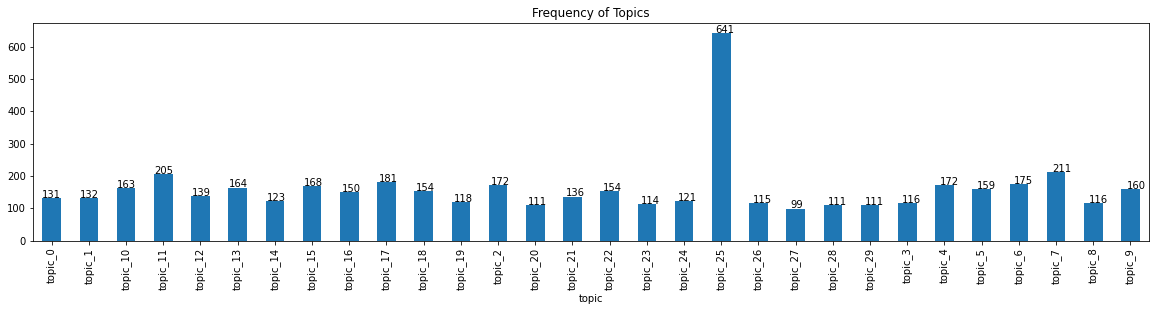

In [ ]:
plt.rcParams["figure.figsize"] = (20,4)

topic_frequency = df.iloc[:, :2].groupby('topic').count()
ax = topic_frequency.plot.bar( legend=False)
plt.title("Frequency of Topics", size=12)
# plt.xticks(rotation=45)
ax.tick_params(axis='x', which='minor', labelsize='small', labelcolor='m', rotation=30)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [ ]:
topics_all = pd.DataFrame.from_dict(document_topic, orient='index')
topic_column_names = ['topic_' + str(i) for i in range(0, 30)]
topics_all.columns = topic_column_names
#topics_all.to_csv(os.path.join(BASE_PATH, "topic_propensities.csv"))

# print(topics_all.describe())
display(topics_all.head())

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
0,0.002351,0.002783,0.002977,0.002831,0.069671,0.227539,0.003681,0.003935,0.002500,0.003006,0.003437,0.004154,0.002953,0.003576,0.002694,0.003337,0.003173,0.003814,0.003394,0.002675,0.002753,0.002619,0.003053,0.552784,0.002139,0.012503,0.062130,0.002401,0.002277,0.002861
1,0.002226,0.002635,0.002818,0.002680,0.003223,0.003150,0.003485,0.003725,0.002367,0.002846,0.003254,0.003933,0.002796,0.003386,0.002550,0.003159,0.090987,0.003611,0.003214,0.819488,0.002607,0.002479,0.002891,0.002654,0.002025,0.011810,0.002866,0.002273,0.002155,0.002708
2,0.896284,0.002949,0.003154,0.003000,0.003608,0.003525,0.003900,0.004169,0.002649,0.003185,0.003642,0.004402,0.003129,0.003789,0.002854,0.003536,0.003362,0.004041,0.003597,0.002835,0.002917,0.002775,0.003235,0.002970,0.002266,0.013031,0.003208,0.002544,0.002412,0.003031
3,0.002649,0.003136,0.003354,0.003190,0.003836,0.003748,0.004147,0.004433,0.002817,0.003387,0.003872,0.004681,0.003328,0.004029,0.003035,0.003760,0.003576,0.004297,0.003825,0.003014,0.003102,0.002950,0.827297,0.003158,0.002410,0.013685,0.003411,0.002705,0.065942,0.003223
4,0.002649,0.003136,0.003354,0.003190,0.003836,0.003748,0.004147,0.090978,0.002817,0.003387,0.371269,0.004681,0.003328,0.004029,0.003035,0.003760,0.003576,0.004297,0.003825,0.003014,0.003102,0.002950,0.003440,0.003158,0.002410,0.446978,0.003411,0.002705,0.002565,0.003223


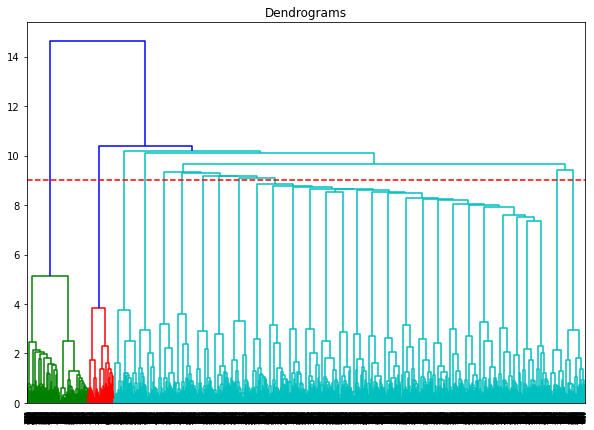

In [ ]:
from scipy.cluster import hierarchy
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = hierarchy.dendrogram(hierarchy.linkage(topics_all, method='ward'))
plt.axhline(y=9, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster = cluster_model.fit_predict(topics_all).tolist()
# print(type(cluster))
topics_all["cluster"] = cluster

In [ ]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(topics_all, hue="cluster")

Error in callback <function flush_figures at 0x7fae7ae78440> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
df_for_h_visual = df
df_for_h_visual["cluster"] = topics_all["cluster"]
df_for_h_visual.drop(['propensity'], axis = 1, inplace=True)
df_for_h_visual.topic.fillna(value="Unknown", inplace=True)
df_for_h_visual.head()

,description,topic,cluster
0,After a devastating earthquake hits Mexico Cit...,topic_23,0
1,"When an army recruit is found dead, his fellow...",topic_19,0
2,"In a postapocalyptic world, rag-doll robots hi...",topic_0,0
3,A brilliant group of students become card-coun...,topic_22,0
4,"After an awful accident, a couple admitted to ...",topic_10,1


In [ ]:
df_for_h_visual.groupby('cluster').count()

,description,topic
cluster,,
0,4300,4300
1,591,591
2,244,244
3,237,237


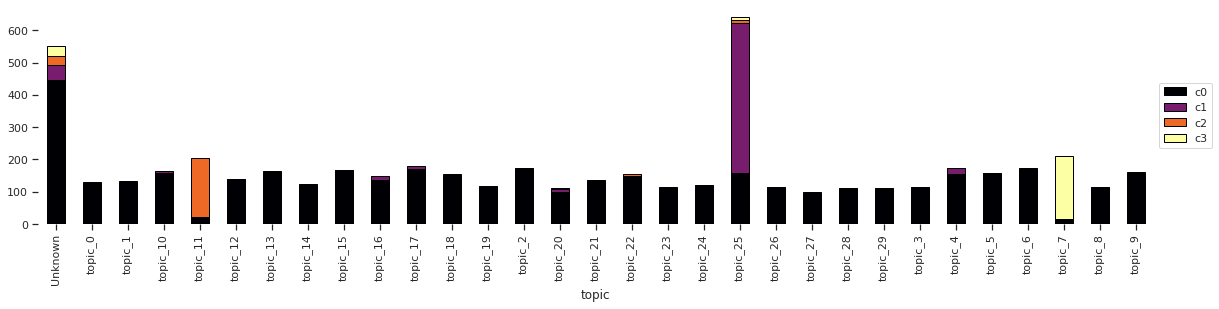

In [ ]:
df_histo = df_for_h_visual.groupby(['topic','cluster']).count().reset_index()
df_histo = df_histo.pivot(index='topic', columns='cluster', values='description')
df_histo.columns = ["c0", "c1", "c2", "c3"]

ax = df_histo.plot.bar(stacked=True,   colormap='inferno', edgecolor='black', linewidth=1)

ax.legend(loc='center left', bbox_to_anchor=(1.0, .5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

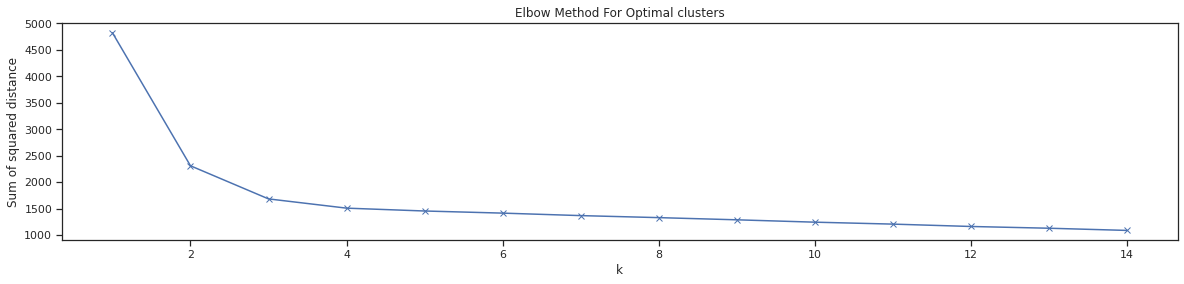

In [ ]:
from sklearn.cluster import KMeans
Sum_of_squared_distance = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(topics_all)
    Sum_of_squared_distance.append(km.inertia_)
plt.plot(K, Sum_of_squared_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method For Optimal clusters')
plt.show()

In [ ]:
from sklearn.cluster import MiniBatchKMeans
Xpca=pca39.transform(df_matrix)
#km=MiniBatchKMeans(n_clusters=4,init='k-means++',max_iter=500,n_init=1000,init_size=1000,batch_size=1000,
                  #verbose=False)
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
km_model=km.fit(Xpca)
kmeanlabels=km.labels_
kmeanclusters = km.predict(Xpca)
kmeandistances = km.transform(Xpca)


Text(0.5, 1.0, 'WordCloud ')

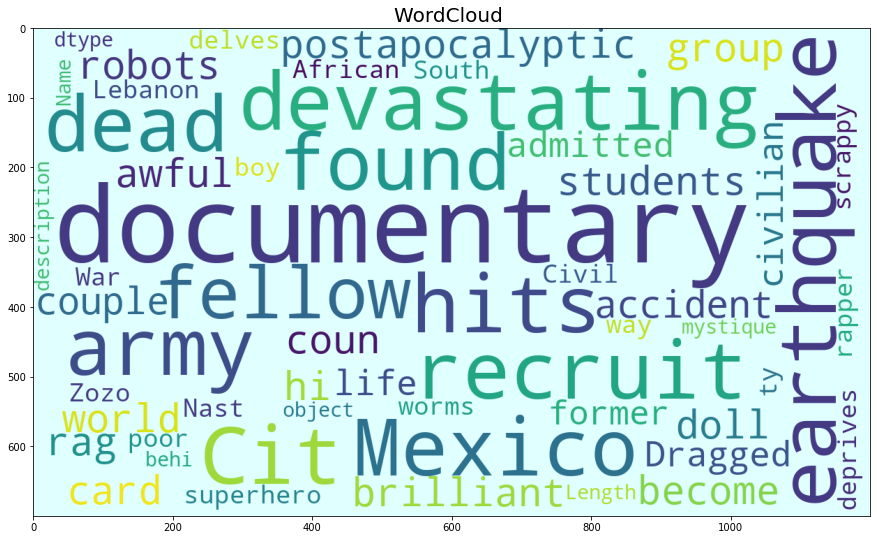

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(data['description']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 20)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

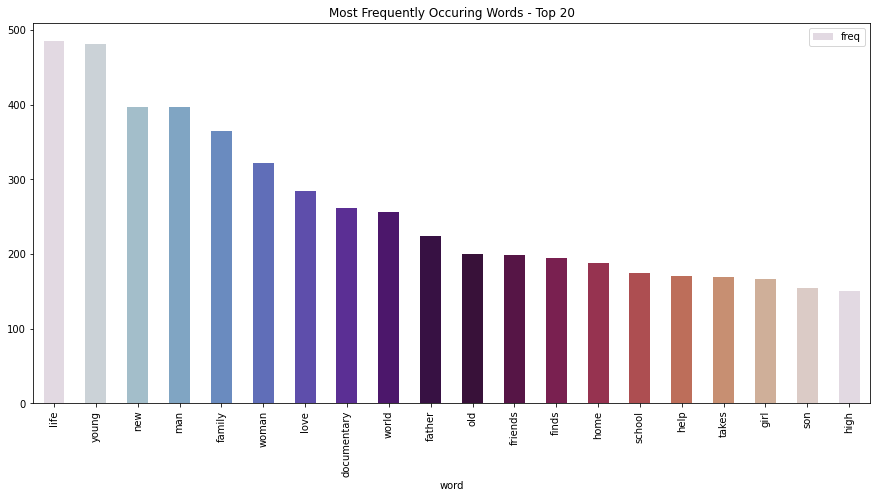

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['description'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

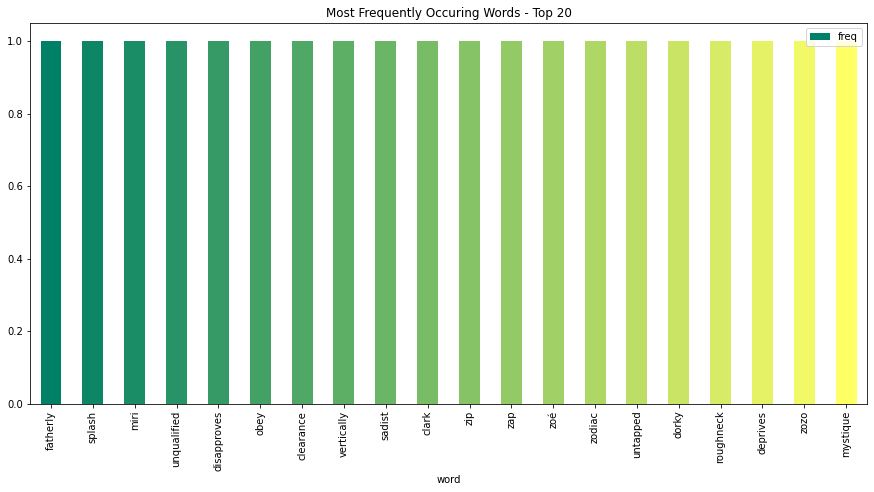

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['description'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [ ]:

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = data.reset_index(drop=True)


In [ ]:


for i in range(0,5142):
    review = re.sub('[^a-zA-Z]', ' ', data['description'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
# vectorizing the data using Tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features = 1000)
X = vectorizer.fit_transform(data['description'])

# getting the shape of X
print("Shape of X :", X.shape)

Shape of X : (5143, 1000)


In [ ]:
df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
print(df1)

       10   11  1970s  1980s   20  ...  year  years  york  young  younger
0     0.0  0.0    0.0    0.0  0.0  ...   0.0    0.0   0.0    0.0      0.0
1     0.0  0.0    0.0    0.0  0.0  ...   0.0    0.0   0.0    0.0      0.0
2     0.0  0.0    0.0    0.0  0.0  ...   0.0    0.0   0.0    0.0      0.0
3     0.0  0.0    0.0    0.0  0.0  ...   0.0    0.0   0.0    0.0      0.0
4     0.0  0.0    0.0    0.0  0.0  ...   0.0    0.0   0.0    0.0      0.0
...   ...  ...    ...    ...  ...  ...   ...    ...   ...    ...      ...
5138  0.0  0.0    0.0    0.0  0.0  ...   0.0    0.0   0.0    0.0      0.0
5139  0.0  0.0    0.0    0.0  0.0  ...   0.0    0.0   0.0    0.0      0.0
5140  0.0  0.0    0.0    0.0  0.0  ...   0.0    0.0   0.0    0.0      0.0
5141  0.0  0.0    0.0    0.0  0.0  ...   0.0    0.0   0.0    0.0      0.0
5142  0.0  0.0    0.0    0.0  0.0  ...   0.0    0.0   0.0    0.0      0.0

[5143 rows x 1000 columns]


In [ ]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Top terms per cluster:
Cluster 0:
 documentary
 follows
 explores
 examines
 life
 career
 interviews
 world
 chronicles
 footage
Cluster 1:
 young
 man
 woman
 love
 family
 life
 father
 girl
 help
 couple
Cluster 2:
 world
 ii
 war
 new
 life
 finds
 man
 save
 outside
 family
Cluster 3:
 life
 new
 family
 man
 love
 father
 school
 finds
 old
 takes
Cluster 4:
 woman
 friends
 home
 special
 stand
 comedy
 new
 life
 family
 comedian




In [ ]:
from collections import Counter

Counter(model.labels_)

Counter({0: 252, 1: 461, 2: 235, 3: 3492, 4: 703})

In [ ]:
binary_actors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22583,22584,22585,22586,22587,22588,22589,22590,22591,22592,22593,22594,22595,22596,22597,22598,22599,22600,22601,22602,22603,22604,22605,22606,22607,22608,22609,22610,22611,22612,22613,22614,22615,22616,22617,22618,22619,22620,22621,22622
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
binary = pd.concat([binary_actors, binary_directors, binary_countries, binary_genres, df1], axis=1,ignore_index=False)
binary.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,violence,violent,visit,voice,vows,wake,wants,war,warrior,water,way,ways,wealthy,web,wedding,weekend,white,widow,widowed,wife,wild,win,winning,wishes,witch,woman,women,work,worker,workers,working,works,world,writer,wrong,year,years,york,young,younger
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327666,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import nltk
import re
import numpy as np
import contractions

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    doc = contractions.fix(doc)
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    #filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['description']))
len(norm_corpus)

ModuleNotFoundError: ignored